# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
response = requests.get(btc_url)
json_response = response.json()
btc_price = json_response["data"]["1"]["quotes"]["CAD"]["price"]

# Fetch current ETH price
response = requests.get(eth_url)
json_response = response.json()
eth_price = json_response["data"]["1027"]["quotes"]["CAD"]["price"]

# Compute current value of my crypto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $37629.91
The current value of your 5.3 ETH is $11597.70


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2023-01-24", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df
df_portfolio.drop('trade_count', axis=1, inplace=True)
df_portfolio.drop('vwap', axis=1, inplace=True)

# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG,SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio

AGG                                     SPY  \
                            open    high    low   close   volume    open   
timestamp                                                                  
2023-01-24 05:00:00+00:00  99.84  100.32  99.68  100.28  6539095  398.88   

                                                            
                             high     low  close    volume  
timestamp                                                   
2023-01-24 05:00:00+00:00  401.15  397.64  400.2  59549719

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $100.28
Current SPY closing price: $400.2


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20010.00
The current value of your 200 AGG shares is $20056.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value

# Create savings DataFrame
savings = [crypto, shares]
df_savings = pd.DataFrame(savings, columns=["amount"], index=["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,49227.603139
shares,40066.000000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

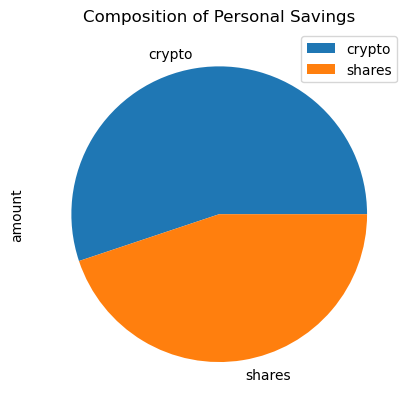

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings = crypto + shares

# Validate saving health
if savings > emergency_fund:
    print(f"Congratulations! You have enough money in your emergency fund.")
elif savings == emergency_fund:
    print(f"Congratulations! You have reached the financial goal.")
else:
    gap = emergency_fund - savings
    print(f"You are ${gap: 0.2f} away from reaching the financial goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-01-24', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-01-24', tz='America/New_York').isoformat()

In [15]:
tickers = ["AGG", "SPY"]
timeframe = "1Day"

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
df_stock_data.drop('trade_count', axis=1, inplace=True)
df_stock_data.drop('vwap', axis=1, inplace=True)

In [17]:
# Add a column of daily return 
df_stock_data['daily_return'] = df_stock_data['close'].pct_change()

In [18]:
# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG,SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2018-01-24 05:00:00+00:00  108.25  108.32  108.15  108.29  2362470   
2018-01-25 05:00:00+00:00  108.26  108.57  108.19  108.57  9858098   
2018-01-26 05:00:00+00:00  108.51  108.51  108.27  108.37  3808163   
2018-01-29 05:00:00+00:00  108.14  108.25  108.02  108.18  3974898   
2018-01-30 05:00:00+00:00  108.12  108.12  107.92  108.01  3659538   

                                           SPY                             \
                          daily_return    open      high      low   close   
timestamp                                                                   
2018-01-24 05:00:00+00:00          NaN  284.02  284.7000  281.840  283.12   
2018-01-25 05:00:00+00:00     0.002586  284.16  284.2700  282.405  283.30   
2018-01-26 05:00:00+00:00    -0.001842  284.25  286.6285  283.960  286.56   
2018-01-29 05:00:00+00:00    -0.001753  285.93  286.4300  284.500  284.64   
2018-01-30 05:00:00+00:00    -0.001571  282.59  284.7360  281.220  281.63   

                                                   
                              volume daily_return  
timestamp                                          
2018-01-24 05:00:00+00:00  137943542     1.823295  
2018-01-25 05:00:00+00:00   85942448     0.000636  
2018-01-26 05:00:00+00:00  111502740     0.011507  
2018-01-29 05:00:00+00:00   90206637    -0.006700  
2018-01-30 05:00:00+00:00  132075557    -0.010575

In [19]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims=500
MC = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252 * 30
) 

In [20]:
# Printing the simulation input data
df_stock_data

AGG                                    \
                             open     high     low   close   volume   
timestamp                                                             
2018-01-24 05:00:00+00:00  108.25  108.320  108.15  108.29  2362470   
2018-01-25 05:00:00+00:00  108.26  108.570  108.19  108.57  9858098   
2018-01-26 05:00:00+00:00  108.51  108.510  108.27  108.37  3808163   
2018-01-29 05:00:00+00:00  108.14  108.250  108.02  108.18  3974898   
2018-01-30 05:00:00+00:00  108.12  108.120  107.92  108.01  3659538   
...                           ...      ...     ...     ...      ...   
2023-01-18 05:00:00+00:00  100.76  100.875  100.37  100.73  7779527   
2023-01-19 05:00:00+00:00  100.73  100.730  100.33  100.50  8633859   
2023-01-20 05:00:00+00:00  100.17  100.260   99.89  100.09  6095775   
2023-01-23 05:00:00+00:00   99.80  100.060   99.78   99.84  6573365   
2023-01-24 05:00:00+00:00   99.84  100.320   99.68  100.28  6539095   

                                           SPY                             \
                          daily_return    open      high      low   close   
timestamp                                                                   
2018-01-24 05:00:00+00:00          NaN  284.02  284.7000  281.840  283.12   
2018-01-25 05:00:00+00:00     0.002586  284.16  284.2700  282.405  283.30   
2018-01-26 05:00:00+00:00    -0.001842  284.25  286.6285  283.960  286.56   
2018-01-29 05:00:00+00:00    -0.001753  285.93  286.4300  284.500  284.64   
2018-01-30 05:00:00+00:00    -0.001571  282.59  284.7360  281.220  281.63   
...                                ...     ...       ...      ...     ...   
2023-01-18 05:00:00+00:00     0.009926  399.01  400.1200  391.280  391.49   
2023-01-19 05:00:00+00:00    -0.002283  389.36  391.0800  387.260  388.64   
2023-01-20 05:00:00+00:00    -0.004080  390.10  396.0400  388.380  395.88   
2023-01-23 05:00:00+00:00    -0.002498  396.72  402.6450  395.720  400.63   
2023-01-24 05:00:00+00:00     0.004407  398.88  401.1500  397.640  400.20   

                                                   
                              volume daily_return  
timestamp                                          
2018-01-24 05:00:00+00:00  137943542     1.823295  
2018-01-25 05:00:00+00:00   85942448     0.000636  
2018-01-26 05:00:00+00:00  111502740     0.011507  
2018-01-29 05:00:00+00:00   90206637    -0.006700  
2018-01-30 05:00:00+00:00  132075557    -0.010575  
...                              ...          ...  
2023-01-18 05:00:00+00:00   99651010    -0.015788  
2023-01-19 05:00:00+00:00   87066127    -0.007280  
2023-01-20 05:00:00+00:00   91806356     0.018629  
2023-01-23 05:00:00+00:00   84187957     0.011999  
2023-01-24 05:00:00+00:00   59549719    -0.001073  

[1259 rows x 12 columns]

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Tracy Lao\Desktop\BootCamp\Homework\WEEK5-Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.


In [ ]:
# Plot simulation outcomes
line_plot = MC.plot_simulation()
line_plot.get_figure().savefig("MC_sim_plot.png", bbox_inches="tight")

In [ ]:
# Plot probability distribution and confidence intervals
dist_plot = MC.plot_distribution()
dist_plot.get_figure().savefig('MC_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC.summarize_cumulative_return()

# Print summary statistics
print(summary)

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary[8]*20000,2)
ci_upper = round(summary[9]*20000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary[8]*30000,2)
ci_upper = round(summary[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_sims=500
MC_five = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252 * 5
) 

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five.calc_cumulative_return()

In [ ]:
# Plot simulation outcomes
l_plot = MC_five.plot_simulation()
l_plot.get_figure().savefig("MC_sim_plot.png", bbox_inches="tight")

In [ ]:
# Plot probability distribution and confidence intervals
dist_plot = MC_five.plot_distribution()
dist_plot.get_figure().savefig('MC_dist_plot.png',bbox_inches='tight')

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_five = MC_five.summarize_cumulative_return()

# Print summary statistics
print(summary_five)

In [ ]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary_five[8]*initial_investment,2)
ci_upper_five = round(summary_five[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_sims=500
MC_ten = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252 * 10
) 

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten.calc_cumulative_return()

In [ ]:
# Plot simulation outcomes
lin_plot = MC_ten.plot_simulation()
lin_plot.get_figure().savefig("MC_sim_plot.png", bbox_inches="tight")

In [ ]:
# Plot probability distribution and confidence intervals
dist_plot = MC_five.plot_distribution()
dist_plot.get_figure().savefig('MC_dist_plot.png',bbox_inches='tight')

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_ten = MC_ten.summarize_cumulative_return()

# Print summary statistics
print(summary_ten)

In [ ]:
# Set initial investment
initial_investment=60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary_ten[8]*initial_investment,2)
ci_upper_ten = round(summary_ten[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")